## Задание №1
Набор данных Davis содержит рост, вес и пол 200 человек. Построить модель, показывающую приблизительную зависимость веса от роста и пола. Оценить вклад роста и пола в вес.
Построить гистограмму величины (repwt - weight), т.е. разницы между заявленным человеком весом и его реальным весом. Аналогично для двух разных полов.

In [38]:
import numpy as np
import pandas as pd

df = pd.read_csv("davis.csv")
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0
4,F,59,157,59.0,155.0


In [39]:
from sklearn.preprocessing import OneHotEncoder

sex_array = df["sex"]
encoder = OneHotEncoder()
sex_array = encoder.fit_transform(sex_array.to_numpy().reshape(-1, 1)).toarray()

X = np.append(sex_array, df["height"].to_numpy().reshape(-1, 1), axis=1)
y = df["weight"].to_numpy()

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1709)

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

print("Root mean square error:", np.sqrt(mean_squared_error(model.predict(X_test), y_test)))
print("Model weights", model.coef_, model.intercept_)

Root mean square error: 11.870715808003006
Model weights [-13.26893044  13.26893044  -0.43196661] 141.45854452904894


**Вывод:** больший вклад в оценку делает вес человека. Причем женский пол негативно влияет оценку, т.е. уменьшает предсказывающий вес человека. Для мужского пола равно наоборот. 

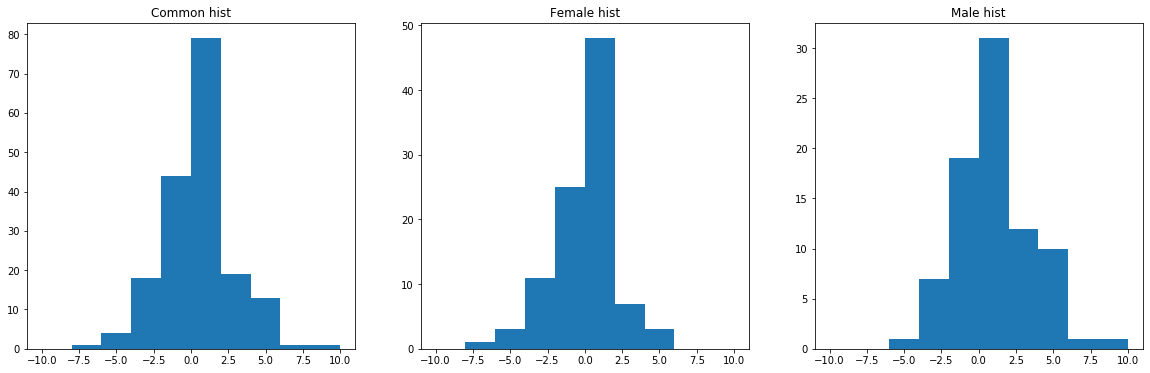

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(20 , 6))
df = df[df.isnull().any(axis=1) == False]

ax[0].hist(df["repwt"] - df["weight"], range=(-10, 10))
ax[0].set_title("Common hist")

female_df = df.loc[df["sex"] == "F"]
ax[1].hist(female_df["repwt"] - female_df["weight"], range=(-10, 10))
ax[1].set_title("Female hist")

male_df = df.loc[df["sex"] == "M"]
ax[2].hist(male_df["repwt"] - male_df["weight"], range=(-10, 10))
ax[2].set_title("Male hist")

plt.show()

## Задание №2
Построить модель, предсказывающую по четырем признакам (температура, давление, относительная влажность и ?) производительность электростанции (мегаватт/час). Оценить точность модели. Построить график, соотносящий истинные и предсказанные значения.

In [6]:
df = pd.read_excel("CCPP/Folds5x2_pp.xlsx", names=["Temperature",
                                                   "Ambient Pressure",
                                                   "Relative Humidity",
                                                   "Exhaust Vacuum",
                                                   "Energy Output"])
df.head()

,Temperature,Ambient Pressure,Relative Humidity,Exhaust Vacuum,Energy Output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [7]:
X = df.drop("Energy Output", axis=1)
y = df["Energy Output"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1709)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Root mean square error:", np.sqrt(mean_squared_error(model.predict(X_test), y_test)))
print("Model weights:", model.coef_, model.intercept_)

Root mean square error: 4.697564879004661
Model weights: [-1.9633196  -0.24088311  0.06574714 -0.15621421] 450.90108385715496


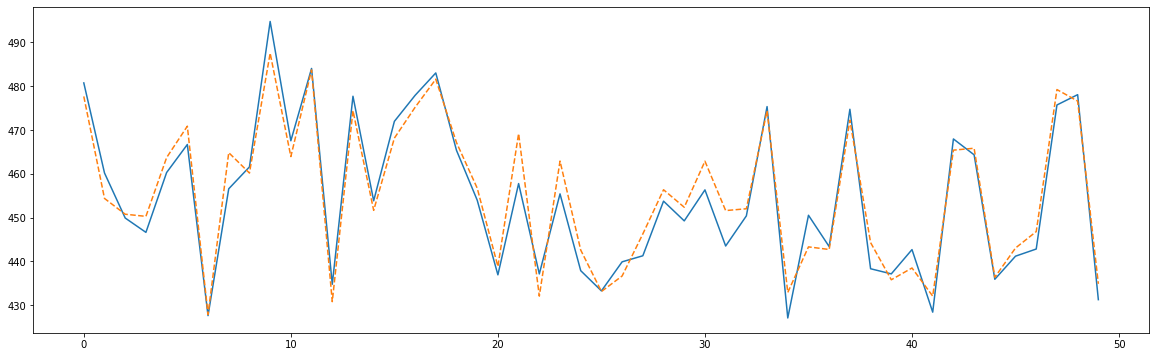

In [9]:
fig, ax = plt.subplots(figsize=(20 , 6))

count = 50
xs = np.arange(0, count, 1)
y1s = y_test[:count]
y2s = model.predict(X_test)[:count]

ax.plot(xs, y1s, color="C0")
ax.plot(xs, y2s, "--", color="C1", )


plt.show()

## Задание № 3
Датасет California housing описывает множество районов Калифорнии через такие атрибуты, как географическое положение (lon/lat), медианный возраст домов, население, общее количество комнат и спален, близость к океану (категориальная), количество домов, медианный доход и медианная стоимость дома. Построить модель, предсказывающую медианную стоимость по остальным признакам. Определить наиболее информативные признаки. Дополнительно построить модель, не использующую географические координаты.

In [10]:
df = pd.read_csv("california_housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


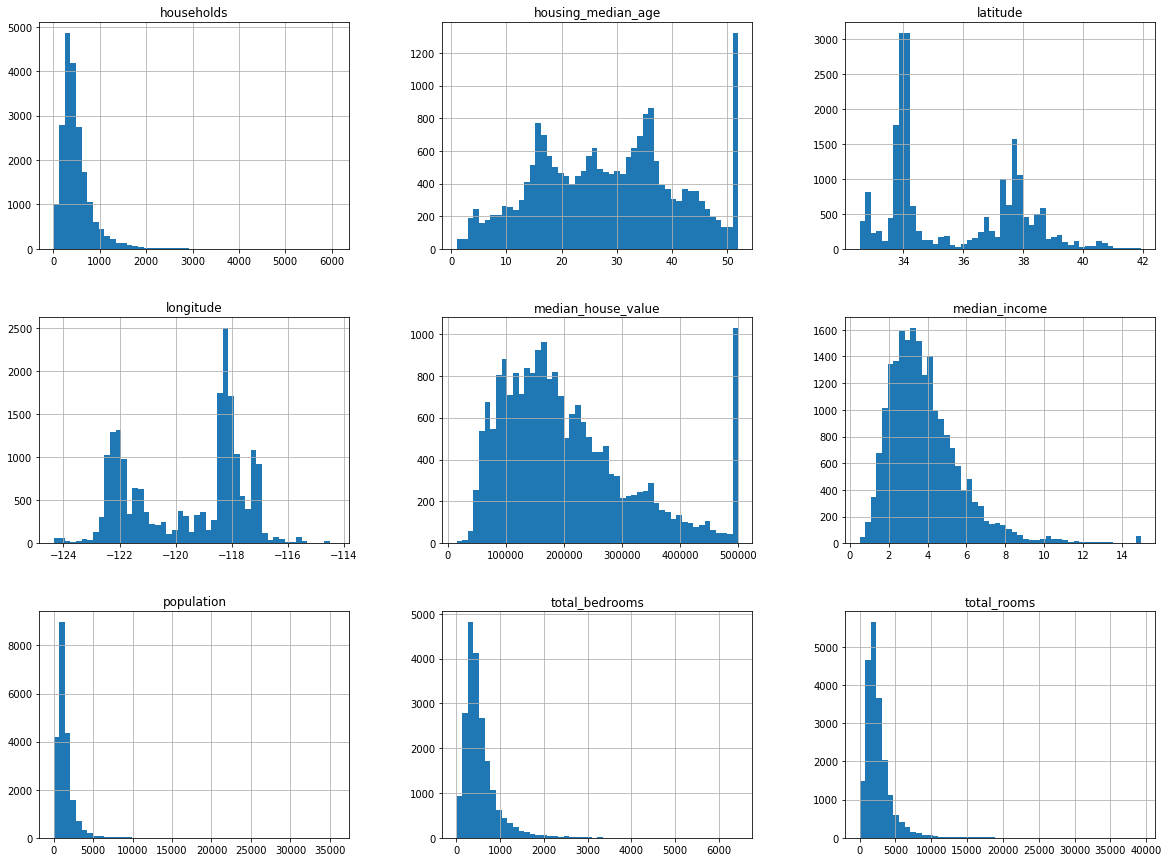

In [11]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import StandardScaler

X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(X.columns).index(col) for col in ("total_rooms",
                                           "total_bedrooms",
                                           "population",
                                           "households")
]

def add_extra_features(X):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
    return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("attribs_adder", FunctionTransformer(add_extra_features, validate=False)),
        ("std_scaler", StandardScaler()),
])

housing_num = X.drop("ocean_proximity", axis=1)
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
])

X_prepared = full_pipeline.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=1709)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Root mean square error:", np.sqrt(mean_squared_error(model.predict(X_test), y_test)))
print("Model weights", model.coef_, model.intercept_)

Root mean square error: 68110.58750717495
Model weights [-56494.47676551 -57159.44452023  13703.84929361  -5005.14977335
  11338.78134204 -44623.49786344  44210.46129512  74245.91866861
   7621.72180853    767.46762471   8531.49439275 -25967.55825346
 -63593.65102589 144152.4155049  -31223.82422758 -23367.38199797] 245050.44418904805


#### Модель, не использующая географические координаты

In [14]:
X_prepared = X_prepared[:, 2:]

X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=1709)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Root mean square error:", np.sqrt(mean_squared_error(model.predict(X_test), y_test)))
print("Model weights", model.coef_, model.intercept_)

Root mean square error: 69081.56727156458
Model weights [ 15156.93776374  -6178.83077623   8380.80352745 -43369.63079968
  47608.52578141  77566.57032584   4216.73821843    541.83579883
   8389.01260997 -28217.32312449 -95085.49111729 163763.39898338
 -24496.58353109 -15964.00121051] 254310.74934540244


## Задание № 4
Обучить классификатор для предсказания диабета, основываясь на данных. Подобрать метрики для оценки классификатора, сделать вывод о влиянии различных факторов на исход.

In [16]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1709)

In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="lbfgs", max_iter=1e5)
%time model.fit(X_train, y_train)

CPU times: user 71.4 ms, sys: 24.2 ms, total: 95.6 ms
Wall time: 59.2 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000.0,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
print("Score:", model.score(X_test, y_test))

Score: 0.7922077922077922


In [20]:
from scipy.optimize import minimize_scalar

class MyBinaryLogisticRegression:
    def __init__(self, alpha=0.0015, max_iters=1e5, eps=1e-2):
        self._alpha = alpha
        self._max_iters = int(max_iters)
        self._eps = eps
        self._weights = None
    
    def _add_ones_column(self, X):
        return np.append(X, np.ones((X.shape[0], 1)), axis=1) 
    
    def _sigmoid(self, x):
        z = np.exp(-x)
        z[np.isinf(z)] = 1
        return 1 / (1 + z)
    
    def _loss(self, X, y, w):
        h = self._sigmoid(np.dot(X, w))
        return -(y * np.log(h) + (1 - y) * np.log(1 - h)).mean()
    
    def _loss_derivate(self, X, y, w):
        z = np.dot(X, w)
        h = self._sigmoid(z)
        return np.dot(X.T, (h - y)) / len(y)    

    def fit(self, X, y):
        X = self._add_ones_column(X)
        self._weights = np.ones(X.shape[1])
        
        dweights = np.ones(self._weights.shape)
        p = 0.75
        
        # Метод инерционного градиентного спуска
        for i in range(self._max_iters):
            gradient = self._loss_derivate(X, y, self._weights + p * dweights)   
            dweights = p * dweights - self._alpha * gradient
            self._weights += dweights
            
            # if np.linalg.norm(gradient) <= self._eps:
            #    break
    
    def predict(self, X):
        X = self._add_ones_column(X)
        return self._sigmoid(np.dot(X, self._weights)).round()
    
    def score(self, X, y):
        return (self.predict(X) == y).mean()
    
    def weights(self):
        return self._weights

In [21]:
model = MyBinaryLogisticRegression()
%time model.fit(X_train, y_train)

CPU times: user 22.3 s, sys: 17.9 ms, total: 22.3 s
Wall time: 22.4 s


In [22]:
print("Score:", model.score(X_test, y_test), "\n")

features = ["Беременность",
            "Глюкоза",
            "Давление",
            "Толщина кожи",
            "Инсулин",
            "Индекс массы тела",
            "Диабет в родословной" ,
            "Возраст"
]

print("Влияние признаков:") 
for label, value in zip(features, model.weights()[:-1]):
    print("\t", "{: <20} {: >10}".format(label, round(value, 3)))

Score: 0.7597402597402597 

Влияние признаков:
	 Беременность              0.612
	 Глюкоза                   0.103
	 Давление                 -0.134
	 Толщина кожи              0.029
	 Инсулин                  -0.004
	 Индекс массы тела         0.118
	 Диабет в родословной      2.796
	 Возраст                   0.013


## Задание № 5
Используя набор данных Rosetta, построить классификатор, определяющий на каком из 30-ти языков программирования написан код. Определить наиболее похожие языки и наиболее важные атрибуты для идентификации каждого языка.

In [23]:
import re

lexical_tokens = re.compile(r"""
(?P<identifier>[a-zA-Z_][a-zA-Z0-9_]*)
|(?P<float>\d+\.\d+)
|(?P<integer>\d+)
|(?P<whitespace>\s+)
|(?P<any>.)
""", re.VERBOSE)

def tokenize(text):
    pos = 0
    while pos < len(text):
        match = lexical_tokens.match(text, pos)
        if not match:
            raise ValueError(f"Cannot lex '{text[pos:]}'")
        else:
            pos = match.end()
            tokname = match.lastgroup
            tokvalue = match.group(tokname)
            if tokname != 'whitespace':
                yield tokvalue

In [24]:
import os
import json

docs = []

for dirpath, dirnames, filenames in os.walk("rosetta/train/"):
    count = 0
    d = {}
    
    for filename in filenames:
        with open(dirpath + os.sep + filename, "r", encoding="utf-8") as file:
            for word in tokenize(file.read()):
                count += 1
                if word in d.keys():
                    d[word] += 1
                else:
                    d[word] = 1
                    
    remove = []
    for key, value in d.items():
        if value <= 7:
            remove.append(key)
    
    for key in remove:
        del d[key]
            
    docs.append({"name" : dirpath.split("/")[-1], "values" : d, "count": count})
    
def doc_with_word(word):
    count = 0
    for lang in docs:
        if word in lang["values"].keys():
            count += 1
    
    return count 

In [25]:
index = {}

for lang in docs:
    name = lang["name"]
    count = lang["count"]
    values = lang["values"]

    for key, value in values.items():
        # TF-IDF
        val = value / count * np.log(len(docs) / doc_with_word(key)) + 1
        if val >= 1 + 1e-4:
            if key in index.keys():
                index[key] += [(name, val)]
            else:
                index[key] = [(name, val)]
        
with open("index.json", "w", encoding="utf-8") as file:     
    json.dump(index, file, indent=4)

In [26]:
def search(words):
    langs = {}
    for word in words:
        if word in index.keys():
            for lang, score in index[word]:
                if lang in langs.keys():
                    langs[lang] += score
                else:
                    langs[lang] = score
                    
    return sorted(langs.items(), key=lambda item: item[1])

In [27]:
count = 0
correct = 0

similar_langs = {}

for dirpath, dirnames, filenames in os.walk("rosetta/test/"):
    lang = dirpath.split("/")[-1]
    for filename in filenames:
        count += 1
        words = []
        with open(dirpath + os.sep + filename, "r", encoding="utf-8") as file:
            for word in tokenize(file.read()):
                words.append(word)
        
        reply = search(words)
        if len(reply) != 0:
            if lang == reply[-1][0]:
                correct += 1
            else:
                similar_lang = " and ".join(sorted([lang, reply[-1][0]]))
                if similar_lang in similar_langs.keys():
                    similar_langs[similar_lang] += 1
                else:
                    similar_langs[similar_lang] = 1
            
print("Score:", correct / count, "\n")

similar_top20 = sorted(similar_langs.items(), key=lambda item: item[1])[-20:]
print("Top 20 similar langs:")
for lang in similar_top20:
    print("\t", lang)

Score: 0.7523253298723772 

Top 20 similar langs:
	 ('Forth and Python', 10)
	 ('Lua and Python', 10)
	 ('Lua and Ruby', 10)
	 ('Forth and Perl', 10)
	 ('Forth and Haskell', 10)
	 ('C and C++', 10)
	 ('JavaScript and R', 11)
	 ('Go and Swift', 11)
	 ('Clojure and Groovy', 13)
	 ('C++ and D', 13)
	 ('Go and JavaScript', 13)
	 ('Erlang and Prolog', 14)
	 ('Python and Ruby', 14)
	 ('PHP and Perl', 14)
	 ('Clojure and Forth', 15)
	 ('D and Java', 16)
	 ('Groovy and Scala', 17)
	 ('Common-Lisp and Scheme', 21)
	 ('Kotlin and Scala', 23)
	 ('Groovy and Java', 23)


In [28]:
important_feature = {}
important_feature_scores = {}

with open("rosetta/selected_languages.txt", "r", encoding="utf-8") as file:
    for current_lang in file:
        for word in index:
            for lang, score in index[word]:
                if lang in important_feature.keys():
                    if important_feature_scores[lang] < score:
                        important_feature_scores[lang] = score
                        important_feature[lang] = word
                else:
                    important_feature_scores[lang] = score
                    important_feature[lang] = word
                    
print("Important feature:")
for item in important_feature.items():
    print("\t", item)

Important feature:
	 ('Scala', 'def')
	 ('Clojure', 'defn')
	 ('Python', 'def')
	 ('Ruby', 'puts')
	 ('Perl', 'my')
	 ('Groovy', 'def')
	 ('Erlang', 'Acc')
	 ('Kotlin', 'fun')
	 ('Scheme', 'define')
	 ('Delphi', 'Writeln')
	 ('R', 'paste')
	 ('Forth', 'dup')
	 ('X86-Assembly', 'mov')
	 ('Common-Lisp', 'defun')
	 ('Rust', 'mut')
	 ('Haskell', 'putStrLn')
	 ('D', 'std')
	 ('C', 'include')
	 ('C++', 'std')
	 ('PHP', 'echo')
	 ('C-sharp', 'Console')
	 ('BASIC', 'PRINT')
	 ('Lua', 'local')
	 ('Ada', 'Ada')
	 ('OCaml', 'let')
	 ('Go', 'Println')
	 ('Java', 'public')
	 ('JavaScript', 'var')
	 ('Prolog', ',')
	 ('Swift', 'let')


## Задание № 6
Построить классификатор цифр. Найти наиболее перепутываемые цифры, отобразить сложные для классификатора примеры.

In [29]:
df = pd.read_csv("digits/train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
X = df.to_numpy()[:5000, 1:]
y = df.to_numpy()[:5000, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1709)

In [31]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore", "lbfgs failed to converge. Increase the number of iterations.")

model = LogisticRegression(solver="lbfgs", max_iter=1e3, tol=1e-2, multi_class="ovr")
%time model.fit(X_train, y_train)

CPU times: user 1min 34s, sys: 12.5 s, total: 1min 46s
Wall time: 27.7 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000.0,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False)

In [32]:
print("Score:", model.score(X_test, y_test))

Score: 0.808


In [33]:
class MyMultiClassLogisticRegression():
    def __init__(self, alpha=0.05, max_iters=1e3, eps=1e-2):
        self._alpha = alpha
        self._max_iters = int(max_iters)
        self._eps = eps
        self._classes = None
        self._weights = None        

    def _one_hot(self, y):
        Y = np.zeros((y.shape[0], self._classes))
        for i in range(y.shape[0]):
            Y[i, y[i]] = 1
        return Y

    def _add_ones_column(self, X):
        return np.append(X, np.ones((X.shape[0], 1)), axis=1) 
    
    def _softmax(self, x):
        # чтоб не переполнялся np.exp
        x_max = np.amax(x, axis=0, keepdims=True)
        
        z = np.exp(x - x_max)
        return z / np.sum(z, axis=0, keepdims=True)
    
    def _loss_derivate(self, X, y, w):
        z = np.dot(w, X.T)
        h = self._softmax(z)
        return np.dot(h - y.T, X) / len(y)
    
    def fit(self, X, y):
        # Кол-во классов
        self._classes = len(np.unique(y))
        
        X = self._add_ones_column(X)  
        y = self._one_hot(y)
        
        # Веса (Классы * Признаки)
        self._weights = np.zeros((self._classes, X.shape[1]))
        dweights = np.zeros(self._weights.shape)
        p = 0.45
        
        # Метод инерционного градиентного спуска
        for _ in range(self._max_iters):
            gradient = self._loss_derivate(X, y, self._weights + p * dweights)           
            dweights = p * self._weights - self._alpha * gradient
            self._weights += dweights
            
            # if np.linalg.norm(gradient) <= self._eps:
            #    break
        
    def predict(self, X):
        X = self._add_ones_column(X)
        z = np.dot(self._weights, X.T)
        p = self._softmax(z)
        return np.argmax(p, axis=0)
    
    def score(self, X, y):
        return (self.predict(X) == y).mean()
    
    def weights(self):
        return self._weights

In [34]:
model = MyMultiClassLogisticRegression()
%time model.fit(X_train, y_train)

CPU times: user 54.8 s, sys: 6.57 s, total: 1min 1s
Wall time: 16.6 s


In [35]:
print("Score:", model.score(X_test, y_test))

Score: 0.793


In [36]:
similar_digits = {}

predict = model.predict(X_test)
for x, y in zip(predict[predict != y_test], y_test[predict != y_test]):
    digit = f"{y} with {x}"
    if digit in similar_digits.keys():
        similar_digits[digit] += 1
    else:
        similar_digits[digit] = 1
        
similar_top10 = sorted(similar_digits.items(), key=lambda item: item[1])[-10:]
print("Top 10 similar digits:")
for digit in similar_top10:
    print("\t", digit)

Top 10 similar digits:
	 ('5 with 0', 6)
	 ('8 with 9', 6)
	 ('5 with 6', 6)
	 ('5 with 1', 8)
	 ('9 with 7', 9)
	 ('5 with 4', 9)
	 ('9 with 4', 11)
	 ('5 with 9', 11)
	 ('5 with 8', 18)
	 ('5 with 3', 22)


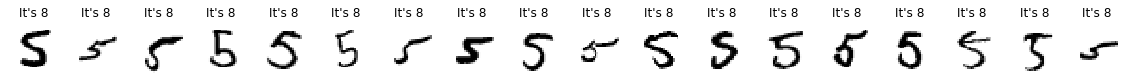

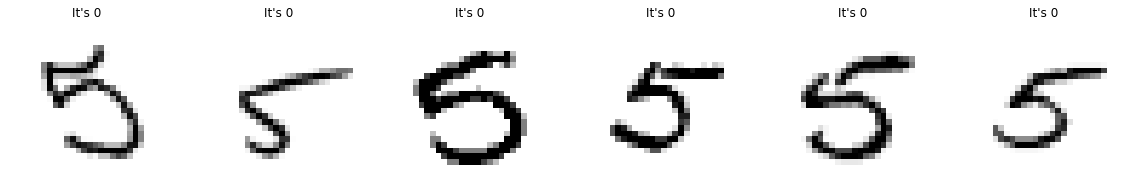

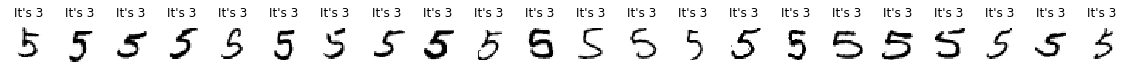

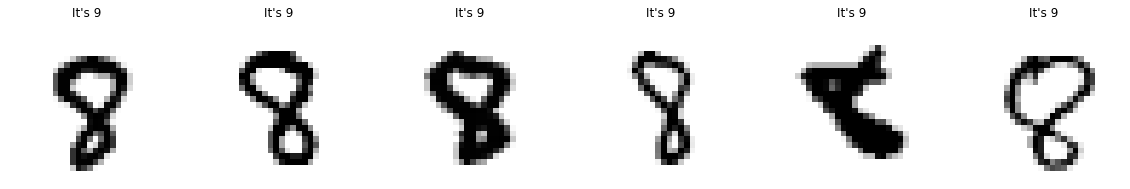

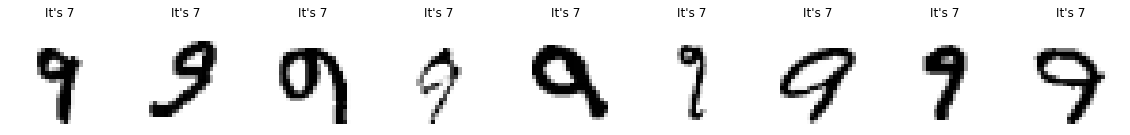

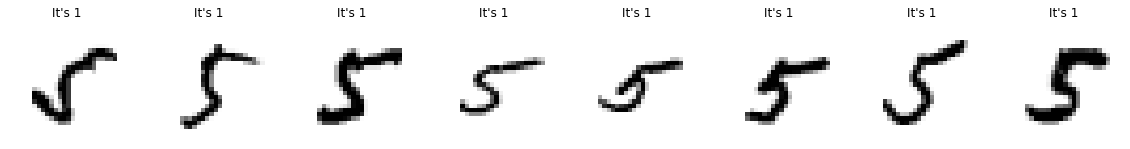

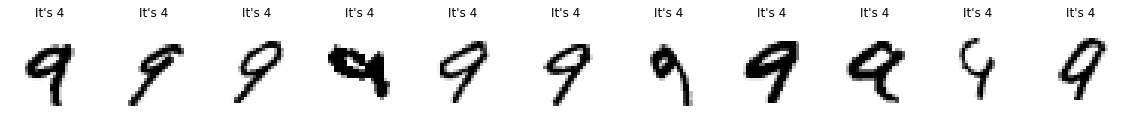

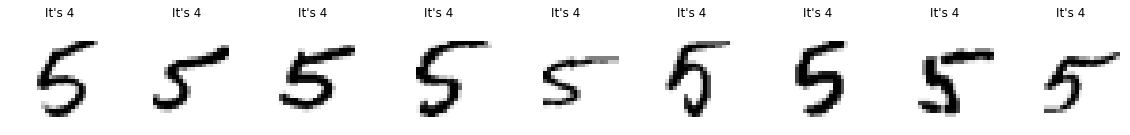

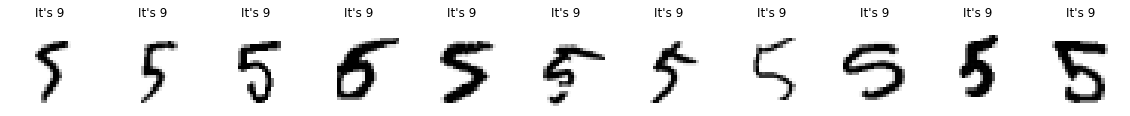

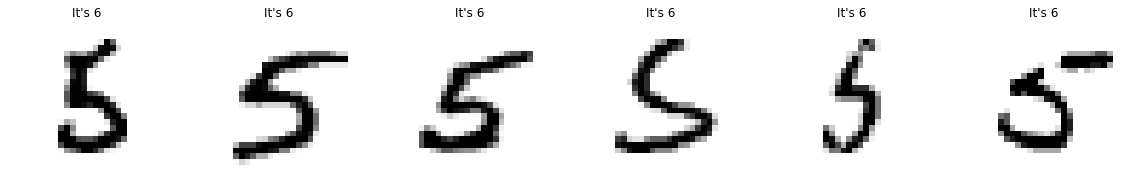

In [37]:
indexs = {}

for i, (x, y) in enumerate(zip(predict[predict != y_test], y_test[predict != y_test])):
    digit = f"{y} with {x}"
    for j, (label, _) in enumerate(similar_top10):
        if digit == label:
            if j in indexs.keys():
                indexs[j].append(i)
            else:
                indexs[j] = [i]

X = X_test[predict != y_test]
y = predict[predict != y_test]

for i, lst in indexs.items():            
    fig, ax = plt.subplots(1, len(lst), figsize=(20,5))
    for j, k in enumerate(lst):
        ax[j].imshow(X[k].reshape((28,28)), cmap="gray_r")
        ax[j].axis("off")
        ax[j].set_title(f"It's {y[k]}")